In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import datetime as dt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
csv_path_train="/kaggle/input/fraud-detection/fraudTrain.csv"
data=pd.read_csv(csv_path_train)
df_train=pd.DataFrame(data)
df_train.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [3]:
csv_path_test="/kaggle/input/fraud-detection/fraudTrain.csv"
data=pd.read_csv(csv_path_test)
df_test=pd.DataFrame(data)
df_test.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# Exploratory Data Analysis (EDA)

In [6]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
df_test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [10]:
df_train["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [11]:
df_test["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

<Axes: >

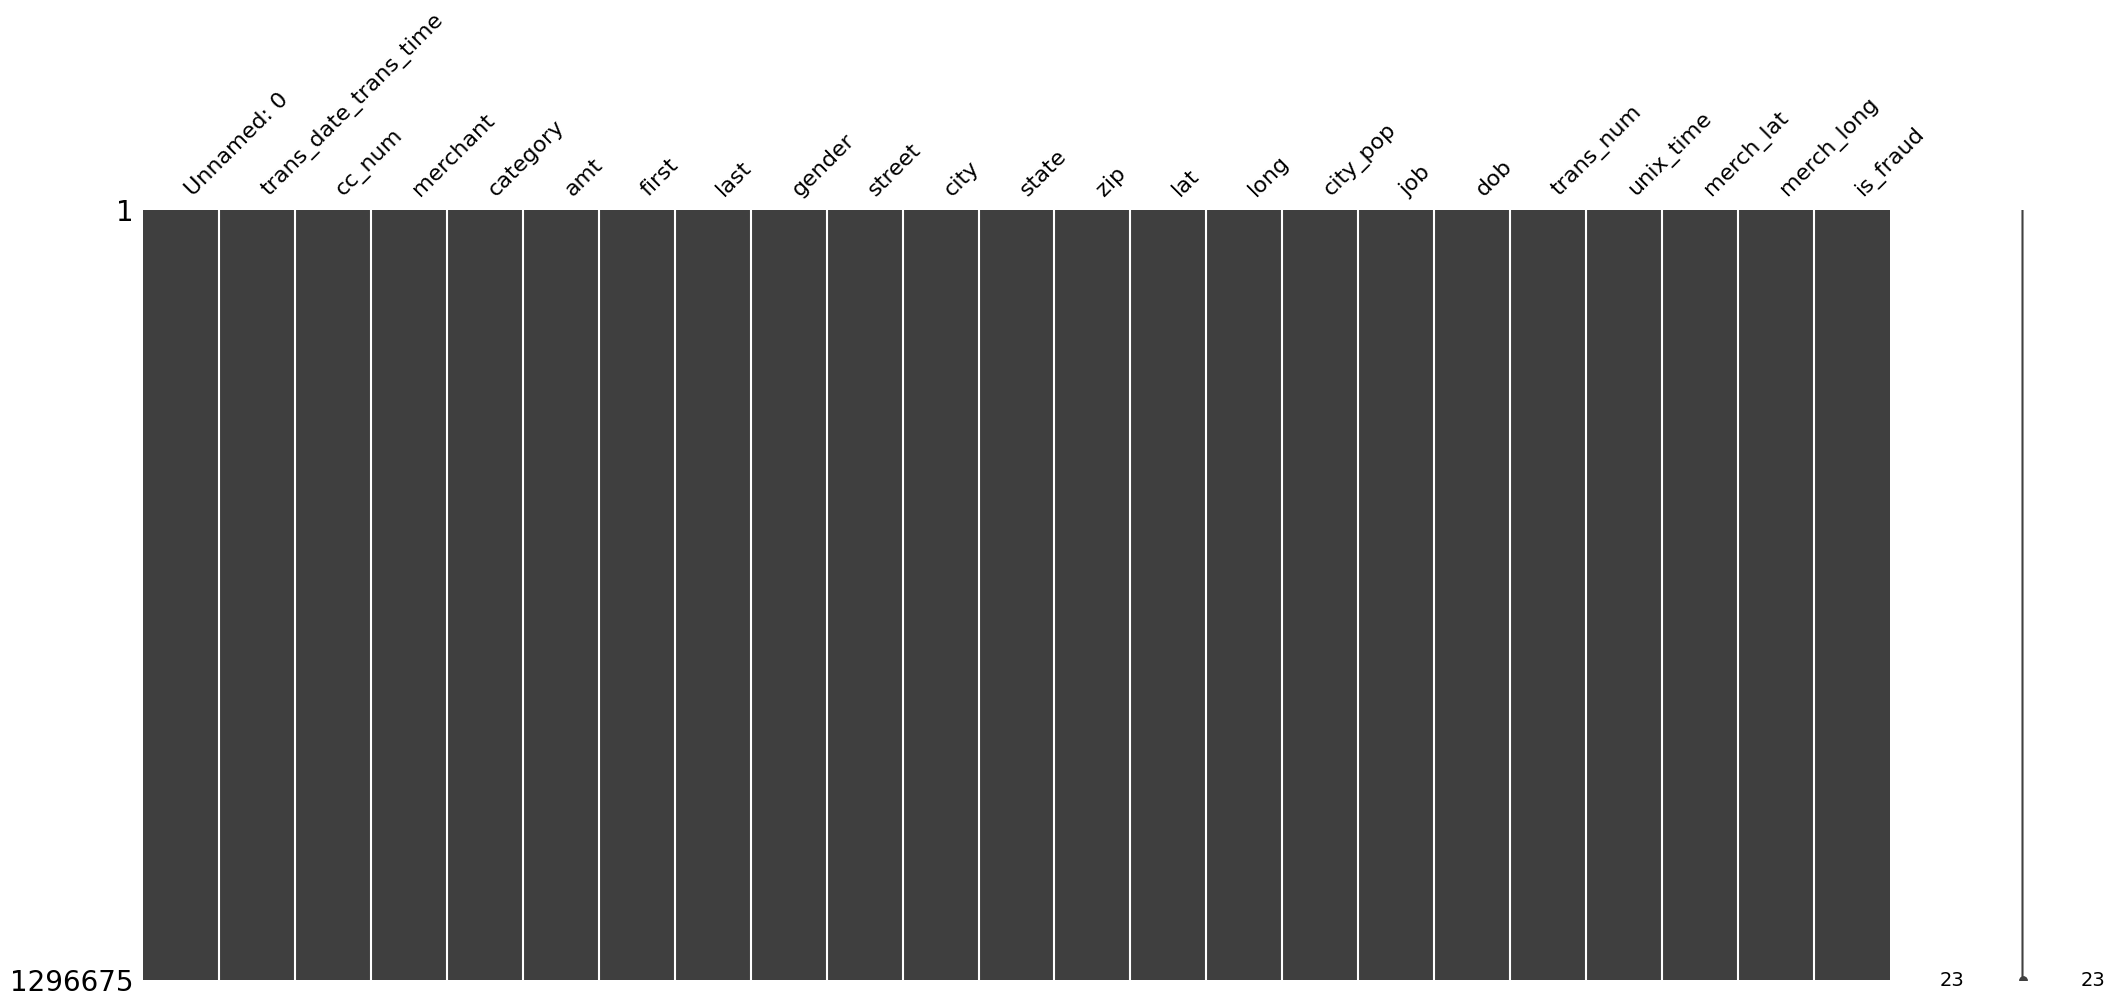

In [12]:

msno.matrix(df_train)

In [13]:
df_train["amt"].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

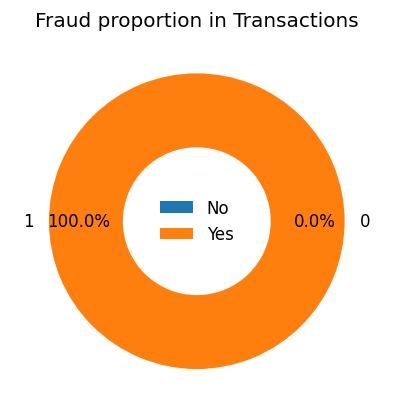

In [14]:
donut = df_train["is_fraud"].value_counts().reset_index()

labels = ["No", "Yes"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["is_fraud"],
        labels=donut["is_fraud"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Fraud proportion in Transactions")
plt.legend(labels, loc="center", frameon=False)
plt.show();

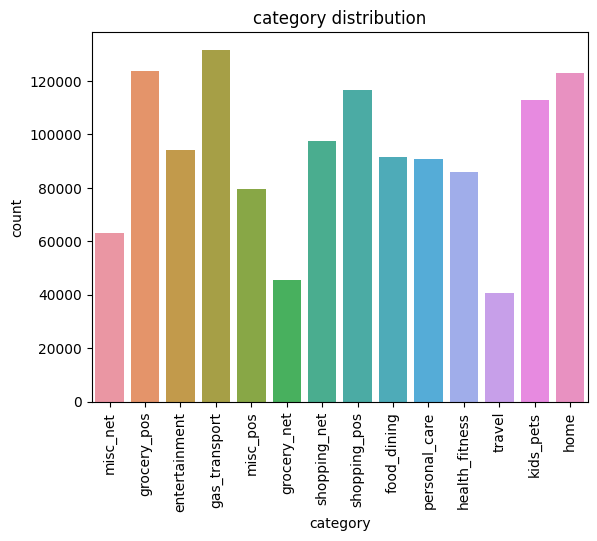

In [15]:

sns.countplot(x="category",data=df_train)
plt.title("category distribution")
plt.xticks(rotation=90)
plt.show()


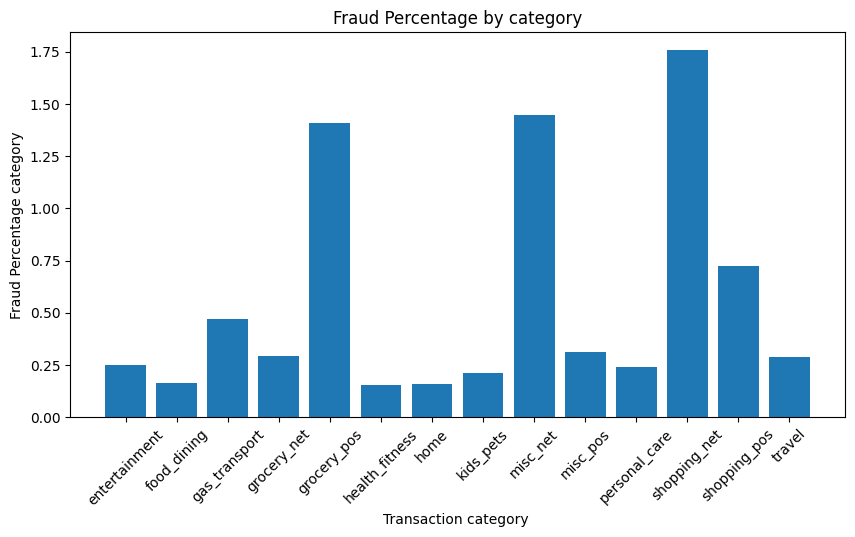

In [16]:
plt.figure(figsize=(10,5))
# Group by "TransactionType" and calculate the mean of "isFraud"
fraud_percentage_by_category = df_train.groupby('category')['is_fraud'].mean() * 100
# Create a bar plot
plt.bar(fraud_percentage_by_category.index, fraud_percentage_by_category.values)
# Adding labels and title
plt.xlabel('Transaction category ')
plt.ylabel('Fraud Percentage category')
plt.title('Fraud Percentage by category')

# Rotate x labels for better readability
plt.xticks(rotation=45)

plt.show()


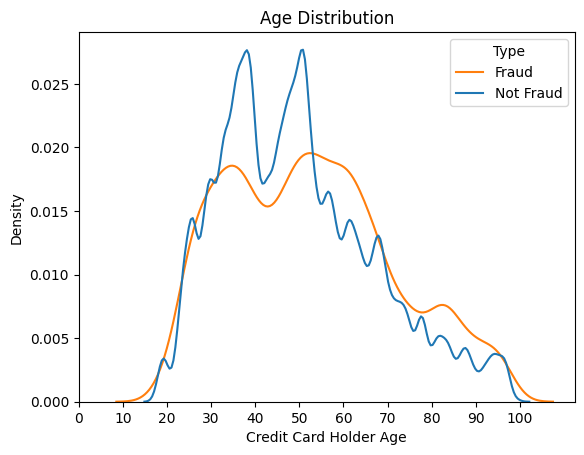

In [17]:
df_train['age'] = dt.date.today().year-pd.to_datetime(df_train['dob']).dt.year
ax = sns.kdeplot(x='age', data=df_train, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 10))
plt.title('Age Distribution')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

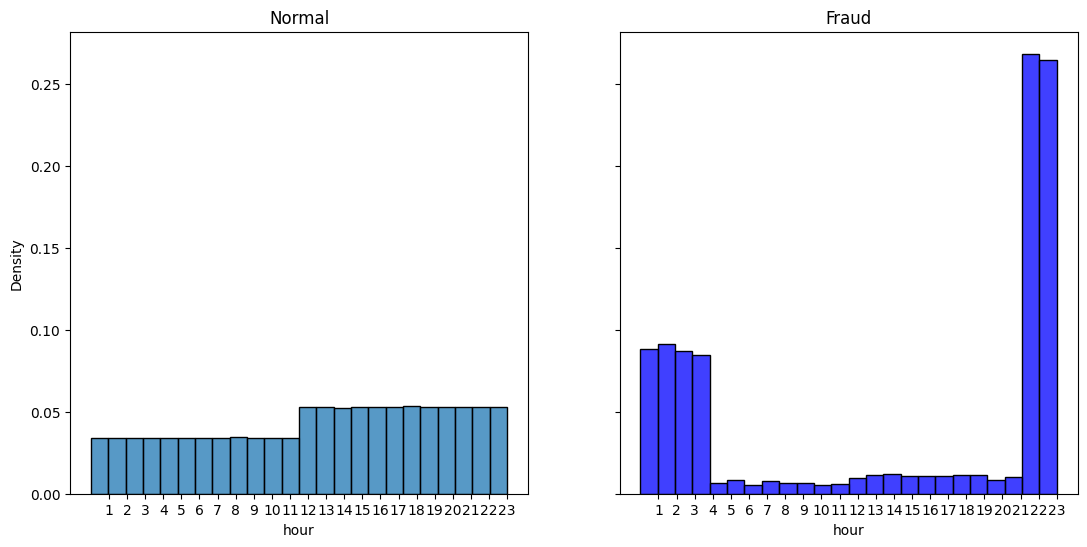

In [18]:
df_train['hour'] = pd.to_datetime(df_train['trans_date_trans_time']).dt.hour
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6), sharey=True)
ax1 = sns.histplot(x='hour', data=df_train[df_train["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1)
ax2 = sns.histplot(x='hour', data=df_train[df_train["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="blue")
ax1.set_title("Normal")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 24))
ax2.set_xticks(np.arange(1, 24));

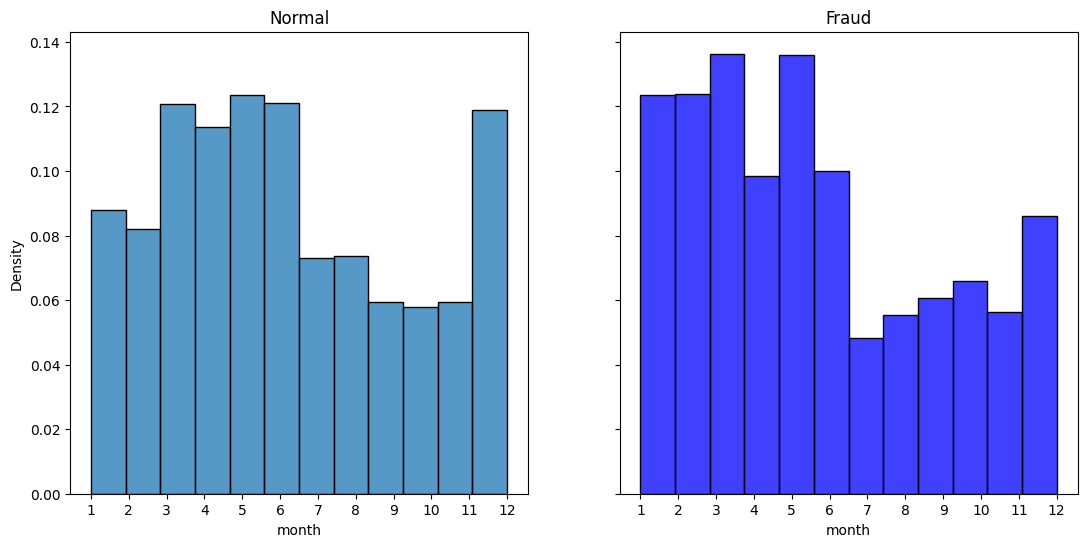

In [19]:
df_train['month'] = pd.to_datetime(df_train['trans_date_trans_time']).dt.month
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6), sharey=True)
ax1 = sns.histplot(x='month', data=df_train[df_train["is_fraud"] == 0],
                   stat="density", bins=12, ax=ax1)
ax2 = sns.histplot(x='month', data=df_train[df_train["is_fraud"] == 1],
                   stat="density", bins=12, ax=ax2, color="blue")
ax1.set_title("Normal")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(1, 13))
ax2.set_xticks(np.arange(1, 13));

# Feature engineering

In [20]:
df_train.drop(columns=["merchant", "first", "last", "street","unix_time", "trans_num","month","age","hour"], inplace=True)
df_test.drop(columns=["merchant", "first", "last", "street","unix_time", "trans_num"], inplace=True)
print(df_train.shape)
print(df_test.shape)

(1296675, 17)
(1296675, 17)


In [21]:

#training data
x_train=df_train.drop("is_fraud",axis=1)
y_train=df_train["is_fraud"]



#testing data
x_test=df_test.drop("is_fraud",axis=1)
y_test=df_test["is_fraud"]
x_train.info()
print(x_train.shape)
print(x_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   gender                 1296675 non-null  object 
 6   city                   1296675 non-null  object 
 7   state                  1296675 non-null  object 
 8   zip                    1296675 non-null  int64  
 9   lat                    1296675 non-null  float64
 10  long                   1296675 non-null  float64
 11  city_pop               1296675 non-null  int64  
 12  job                    1296675 non-null  object 
 13  dob                    1296675 non-null  object 
 14  merch_lat         

**pipeline creation**

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

#numerical features
num_feats=x_train.drop(["trans_date_trans_time","category","gender","city","state","job","dob"],axis=1)
num_feats_pipe=Pipeline([
    ("scalar",MinMaxScaler())
    ])
num_feats_preprocessed=num_feats_pipe.fit_transform(num_feats)

#catagorical features
cat_feats=x_train[["trans_date_trans_time","category","gender","city","state","job","dob"]]
cat_feats_pipe=Pipeline([
    ("encoder",OneHotEncoder())
    ])
cat_feats_preprocessed=cat_feats_pipe.fit_transform(cat_feats)
print(num_feats)

         Unnamed: 0               cc_num     amt    zip      lat      long  \
0                 0     2703186189652095    4.97  28654  36.0788  -81.1781   
1                 1         630423337322  107.23  99160  48.8878 -118.2105   
2                 2       38859492057661  220.11  83252  42.1808 -112.2620   
3                 3     3534093764340240   45.00  59632  46.2306 -112.1138   
4                 4      375534208663984   41.96  24433  38.4207  -79.4629   
...             ...                  ...     ...    ...      ...       ...   
1296670     1296670       30263540414123   15.56  84735  37.7175 -112.4777   
1296671     1296671     6011149206456997   51.70  21790  39.2667  -77.5101   
1296672     1296672     3514865930894695  105.93  88325  32.9396 -105.8189   
1296673     1296673     2720012583106919   74.90  57756  43.3526 -102.5411   
1296674     1296674  4292902571056973207    4.30  59871  45.8433 -113.8748   

         city_pop  merch_lat  merch_long  
0            3495  3

**final pipeline**

In [23]:

from sklearn.compose import ColumnTransformer
num_list=list(num_feats)
cat_list=list(cat_feats)

final_pipeline=ColumnTransformer([
    ("num",num_feats_pipe,num_list),
    ("cat",cat_feats_pipe,cat_list)])
X_train_preprocessed=final_pipeline.fit_transform(x_train)
print(df_train)
X_train_preprocessed

X_test_preprocessed = final_pipeline.fit_transform(x_test)
X_test_preprocessed

         Unnamed: 0 trans_date_trans_time               cc_num       category  \
0                 0   2019-01-01 00:00:18     2703186189652095       misc_net   
1                 1   2019-01-01 00:00:44         630423337322    grocery_pos   
2                 2   2019-01-01 00:00:51       38859492057661  entertainment   
3                 3   2019-01-01 00:01:16     3534093764340240  gas_transport   
4                 4   2019-01-01 00:03:06      375534208663984       misc_pos   
...             ...                   ...                  ...            ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123  entertainment   
1296671     1296671   2020-06-21 12:12:19     6011149206456997    food_dining   
1296672     1296672   2020-06-21 12:12:32     3514865930894695    food_dining   
1296673     1296673   2020-06-21 12:13:36     2720012583106919    food_dining   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207    food_dining   

            amt gender     

<1296675x1277223 sparse matrix of type '<class 'numpy.float64'>'
	with 20737890 stored elements in Compressed Sparse Row format>

# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=21)

# Train the model on your training data
rf_model.fit(X_train_preprocessed,y_train)

# Make predictions on your testing data
y_test_pred_rf = rf_model.predict(X_test_preprocessed)



In [25]:
# Make predictions on your training data
y_train_pred_rf = rf_model.predict(X_train_preprocessed)
y_train_pred_rf
y_test_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

**F1 score of train and test**

In [26]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train,y_train_pred_rf)
print("F1 Score of train data:", f1)

f2 = f1_score(y_test,y_test_pred_rf)
print("F1 Score of test data:", f2)

F1 Score of train data: 0.9980644730694788
F1 Score of test data: 0.9980644730694788


In [27]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00      7506

    accuracy                           1.00   1296675
   macro avg       1.00      1.00      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675



**Train Confusion Matrix**

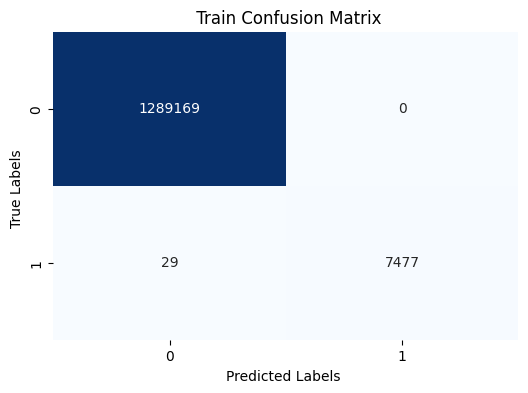

In [28]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred_rf)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Train Confusion Matrix")
plt.show()


**Test Confusion Matrix**

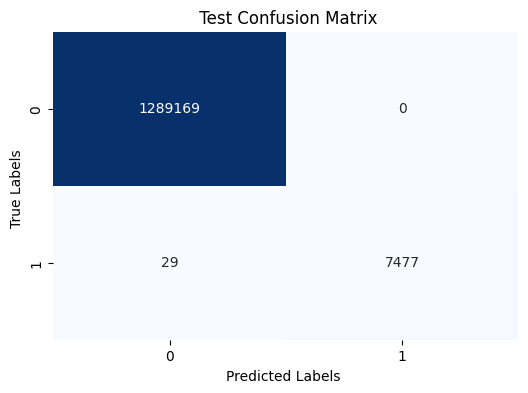

In [29]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_rf)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels ")
plt.ylabel("True Labels ")
plt.title(" Test Confusion Matrix")
plt.show()
